# Time series clustering exercise

# Data

Download the census bureau business data for all years 1993-2014. You can investigate using the API (I have not done it with the census bureau). I did is as you see below

The data is on the github repo. Each file is the economic census for 1 year. 
Download it programmatically and move it to PUIdata

 Download the NYC zipcodes shapefile. One of many ways in which you can get the zipcodes shapefile for NYC
 https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip


## You can use zipfile module in python to unzip the files
it should be installed in your system, but if it is not you can get the code with wget from here
https://github.com/python/cpython/blob/2.7/Lib/zipfile.py
remembering to use the raw link
(or you can use the usual shell commands)

In [127]:
import numpy as np
import pandas as pd
import os
import zipfile
import urllib.request as urllib
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [128]:
PUIdata = os.getenv('PUIDATA')
print (PUIdata)

/nfshome/jz3525/PUIdata


In [129]:
urllib.urlretrieve('https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip', 'zipfile.zip')
!unzip -d $PUIDATA zipfile.zip

Archive:  zipfile.zip
  inflating: /nfshome/jz3525/PUIdata/ZIP_CODE_040114.shx  
  inflating: /nfshome/jz3525/PUIdata/ZIP_CODE_040114.dbf  
  inflating: /nfshome/jz3525/PUIdata/ZIP_CODE_040114.prj  
  inflating: /nfshome/jz3525/PUIdata/ZIP_CODE_040114.sbn  
  inflating: /nfshome/jz3525/PUIdata/ZIP_CODE_040114.sbx  
  inflating: /nfshome/jz3525/PUIdata/ZIP_CODE_040114.shp  
  inflating: /nfshome/jz3525/PUIdata/ZIP_CODE_040114.shp.xml  


In [130]:
nyczipsshp = gpd.read_file(os.getenv('PUIDATA') + '/ZIP_CODE_040114.shp')
nyczipsshp['ZIPCODE'] = nyczipsshp['ZIPCODE'].apply(pd.to_numeric)
nyczipsshp.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0    11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1    11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2    11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3    11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4    11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.251871482 188138.3800067157,...  
1  POLYGON ((1001613.712964058 186926.4395172149,...  
2  POLYGON ((1011174.275535807 183696.33770971, 1...  
3  POLYGON ((995908.3654508889 183617.6128015518,...  
4  POLYGON ((991997.1134308875 176307.4958601296,...

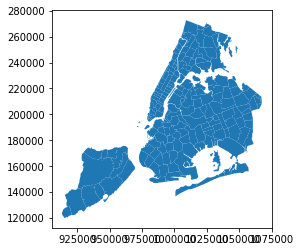

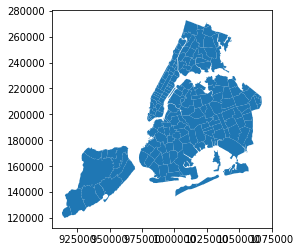

In [131]:
nyczipsshp.plot()
nyczipsshp.drop_duplicates("ZIPCODE").plot()

In [87]:
ziplist = []
for i in range(94, 100):
    ziplist.append(str(i))
for j in range(10):
    ziplist.append('0' + str(j))
for k in range(10, 15):
    ziplist.append(str(k))

In [133]:
url = 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW12_fb55/zbp'
for i in range(len(ziplist)):
    f = url + ziplist[i] + 'totals.zip'
    fname = 'zbp' + ziplist[i] + 'totals.zip'
    urllib.urlretrieve(f, fname)

In [134]:
data = nyczipsshp[['ZIPCODE']].sort_values(by = 'ZIPCODE').\
    reset_index().drop(['index'], axis = 1).rename(columns = {'ZIPCODE':'zip'})

for i in ziplist:
    fname = 'zbp' + i + 'totals.zip'
    zf = zipfile.ZipFile(fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df.columns = map(str.lower, df.columns)
    df = df[['zip', 'est']].rename(columns = {'est': i})
    data = data.merge(df, on = 'zip', how = 'left')

In [135]:
!mv *.zip $PUIDATA

In [136]:
data = data.set_index('zip')
data.head()

94      95      96      97      98      99      00      01      02  \
zip                                                                             
83        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
10001  6999.0  7088.0  7075.0  7154.0  7254.0  7233.0  7317.0  7188.0  7141.0   
10002  1784.0  1819.0  1919.0  2049.0  2003.0  2085.0  2277.0  2543.0  2269.0   
10003  3256.0  3377.0  3417.0  3535.0  3649.0  3659.0  3683.0  3602.0  3616.0   
10004  1115.0  1124.0  1133.0  1173.0  1176.0  1233.0  1294.0  1247.0  1253.0   

           03   ...        05      06      07      08      09      10      11  \
zip             ...                                                             
83        NaN   ...       NaN     NaN     NaN     NaN     NaN     NaN     NaN   
10001  7084.0   ...    7312.0  7415.0  7549.0  7472.0  7305.0  7241.0  7227.0   
10002  2402.0   ...    2682.0  2686.0  2685.0  2691.0  2775.0  2872.0  2912.0   
10003  3704.0   ...    3867.0  3909.0  4049.0  4071.0  4099.0  4113.0  4159.0   
10004  1252.0   ...    1260.0  1311.0  1370.0  1376.0  1379.0  1398.0  1404.0   

           12      13      14  
zip                            
83        NaN     NaN     NaN  
10001  7235.0  7273.0  7369.0  
10002  2954.0  2988.0  2972.0  
10003  4214.0  4277.0  4333.0  
10004  1442.0  1479.0  1554.0  

[5 rows x 21 columns]

# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check: you should have 20 (N_timestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)


IMPORTANT: read the instructions below on pre-processing. Afte rthat:

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



## TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to 
    decide what a good number is here. try a few options, keeping in mind 
    a few is more than a couple, but i recommand you stay within the 
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of 
    the clusters). you can plot for example the cluster centers overlayed on 
    each time series (using the alpha channel to control the opacity in the 
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the 
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is 
    an exploratory tool so you do not want to jump to conclusions because 
    you see some clusters! but seeing structure in your data can inform 
    your next moves as an investigator. 
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris. 
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.* 

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [90]:
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [91]:
# 20 years of data and 263 zipcodes
cbs = data
cbs.shape

(263, 21)

In [92]:
#cleaning all missing values
cleancsb = cbs.dropna()
cleancsb.shape

(243, 21)

In [114]:
#then the standardization will look like:
vals = ((cleancsb.T - cleancsb.mean(1)) / cleancsb.std(1)).T
vals.head()

94        95        96        97        98        99        00  \
zip                                                                           
10001 -1.839191 -1.193297 -1.287641 -0.714319  0.011404 -0.140998  0.468610   
10002 -1.713540 -1.626405 -1.377447 -1.053802 -1.168323 -0.964178 -0.486179   
10003 -1.820497 -1.434653 -1.307101 -0.930824 -0.567301 -0.535414 -0.458882   
10004 -1.512649 -1.438217 -1.363786 -1.032980 -1.008170 -0.536772 -0.032293   
10004 -1.512649 -1.438217 -1.363786 -1.032980 -1.008170 -0.536772 -0.032293   

             01        02        03    ...           05        06        07  \
zip                                    ...                                    
10001 -0.467573 -0.808663 -1.222326    ...     0.432324  1.179819  2.152288   
10002  0.176049 -0.506095 -0.174982    ...     0.522100  0.532058  0.529569   
10003 -0.717175 -0.672532 -0.391918    ...     0.127855  0.261785  0.708216   
10004 -0.420990 -0.371369 -0.379639    ...    -0.313478  0.108300  0.596238   
10004 -0.420990 -0.371369 -0.379639    ...    -0.313478  0.108300  0.596238   

             08        09        10        11        12        13        14  
zip                                                                          
10001  1.593481  0.381523 -0.082940 -0.184541 -0.126483  0.149292  0.845986  
10002  0.544506  0.753631  0.995120  1.094703  1.199265  1.283911  1.244077  
10003  0.778369  0.867655  0.912298  1.058983  1.234367  1.435260  1.613833  
10004  0.645859  0.670669  0.827802  0.877423  1.191688  1.497684  2.117945  
10004  0.645859  0.670669  0.827802  0.877423  1.191688  1.497684  2.117945  

[5 rows x 21 columns]

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

## KMeans Clustering with n = 5

In [115]:
#cluster with kmeans
nc = 5
km = KMeans(n_clusters=nc, random_state=444).fit(vals)
vals['5kmeans'] = km.labels_
km.labels_

array([0, 0, 3, 3, 3, 3, 3, 0, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 3, 1, 2, 1, 1,
       0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 1, 3, 0, 0, 2, 3, 0,
       1, 2, 1, 4, 4, 1, 4, 1, 1, 0, 3, 1, 0, 4, 1, 1, 1, 0, 1, 1, 4, 4, 4,
       4, 2, 1, 1, 3, 4, 1, 2, 3, 1, 1, 3, 1, 1, 4, 1, 1, 2, 0, 2, 0, 1, 0,
       1, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 4, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 3, 3, 3, 2, 2, 2, 3, 0, 3, 3, 3, 4, 4, 3, 0, 3, 3, 3, 0, 4, 3,
       0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 4, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 0, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 0, 4, 3, 3, 0, 2, 0,
       0, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0], dtype=int32)

In [116]:
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape

(243,)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


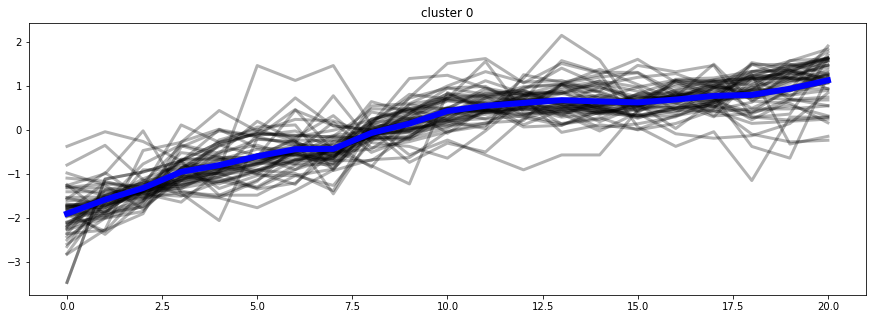

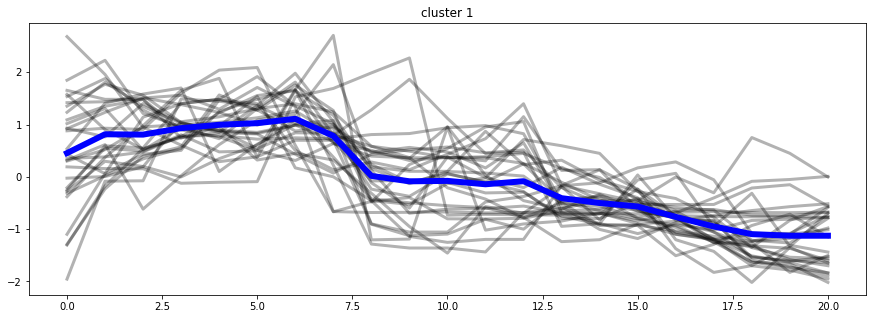

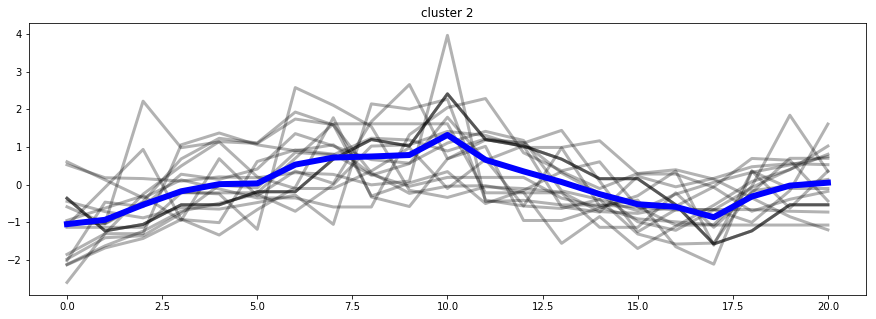

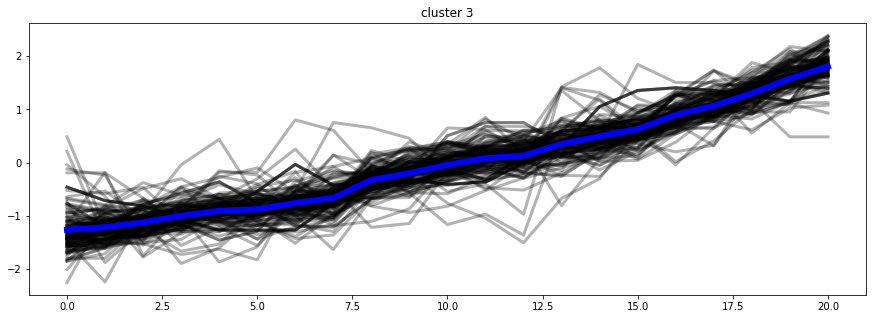

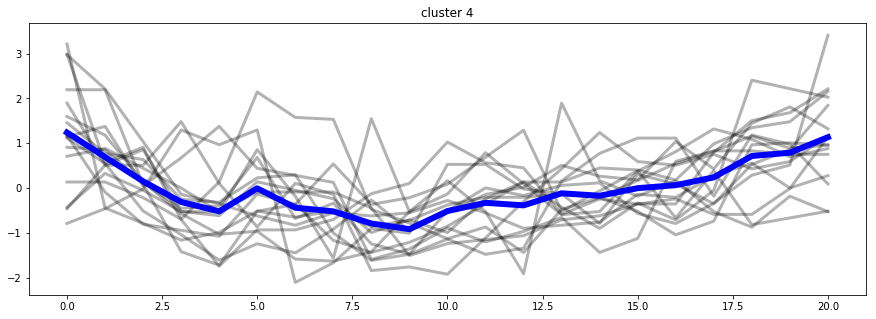

In [96]:
for i in range(nc):
    fig = plt.figure(figsize = (15,5))
    for j in range(len(vals[vals['5kmeans'] == i])):
        ax = fig.add_subplot(111)
        ax.plot(range(21), vals[vals['5kmeans'] == i].iloc[j,0:21], c='k', linewidth = 3, alpha = .3)
    ax.plot(range(21), vals[vals['5kmeans'] == i].iloc[:,:21].mean(), c = 'b', linewidth = 6)
    ax.set_title('cluster {}'.format(i))

### Figure 1: 
KMeans Clustering with n = 5 applied on time series data. We can see that the cluster 0 and 3 have the most data and thus their trends is much clearer than others.

In [117]:
vals_merge = vals.reset_index()
vals_merge = vals_merge[['zip', '5kmeans']]
nyczipsshp = nyczipsshp.merge(vals_merge, left_on = 'ZIPCODE', right_on = 'zip')
nyczipsshp.drop(['zip'], axis = 1, inplace = True)
nyczipsshp.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0    11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1    11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2    11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3    11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4    11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  5kmeans  
0  POLYGON ((1038098.251871482 188138.3800067157,...        3  
1  POLYGON ((1001613.712964058 186926.4395172149,...        3  
2  POLYGON ((1011174.275535807 183696.33770971, 1...        3  
3  POLYGON ((995908.3654508889 183617.6128015518,...        3  
4  POLYGON ((991997.1134308875 176307.4958601296,...        3

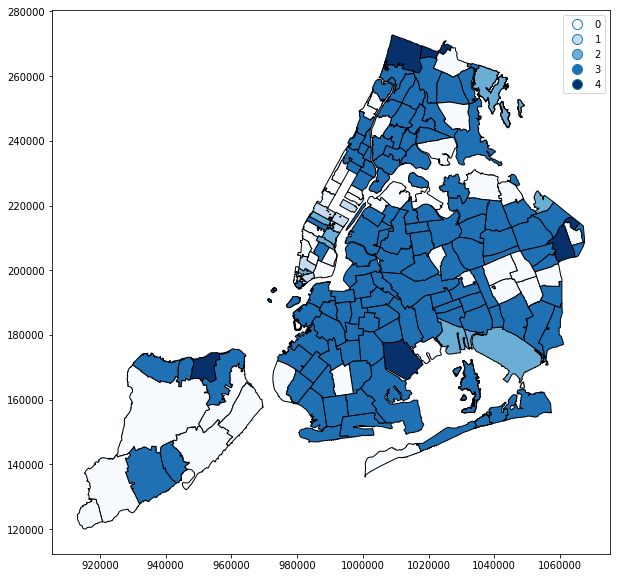

In [52]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
nyczipsshp.plot(column = '5kmeans', cmap = 'Blues', edgecolor = 'k', legend=True, categorical=True, ax = ax)

### Figure 2: 
cloropleth of  cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

## KMeans Clustering with n = 6

In [118]:
nc = 6
km = KMeans(n_clusters=nc, random_state=444).fit(vals)
vals['6kmeans'] = km.labels_
km.labels_

array([2, 2, 0, 0, 0, 0, 0, 2, 3, 4, 2, 4, 2, 2, 3, 2, 4, 1, 0, 1, 4, 1, 1,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 1, 0, 2, 2, 4, 0, 2,
       1, 4, 1, 5, 5, 3, 5, 1, 1, 2, 0, 1, 2, 5, 1, 3, 1, 2, 3, 1, 5, 5, 5,
       5, 4, 1, 1, 0, 5, 1, 4, 0, 3, 3, 0, 1, 3, 5, 3, 1, 4, 2, 4, 2, 3, 2,
       3, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 5, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 4, 4, 4, 0, 2, 0, 0, 0, 5, 5, 0, 2, 0, 0, 0, 2, 5, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 5, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 2, 5, 0, 0, 2, 4, 2,
       2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


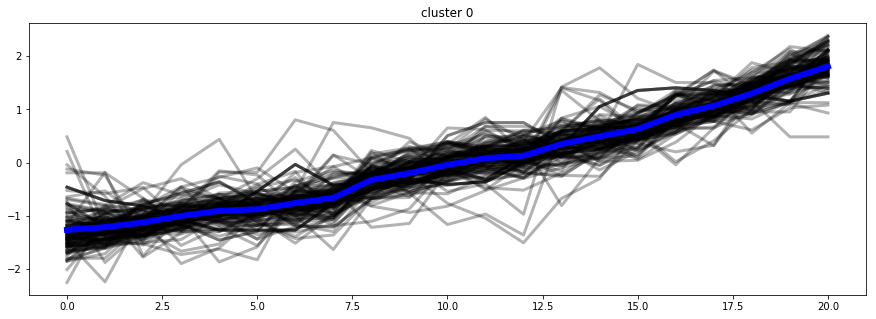

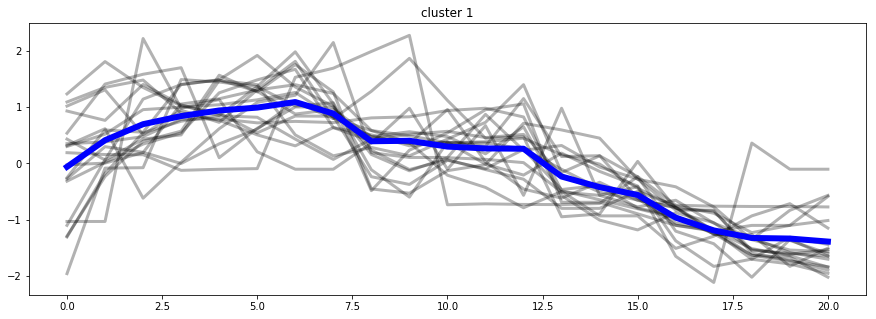

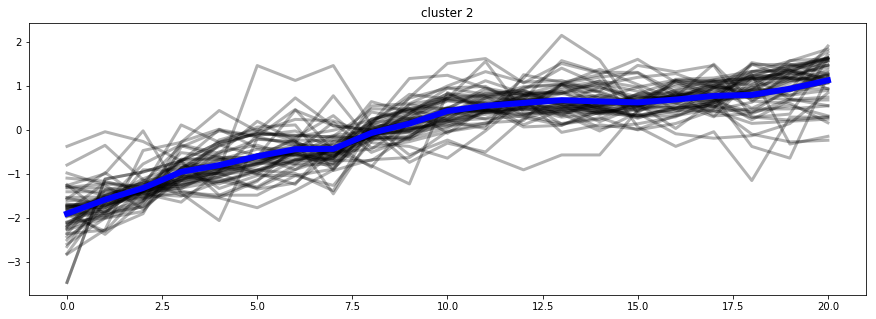

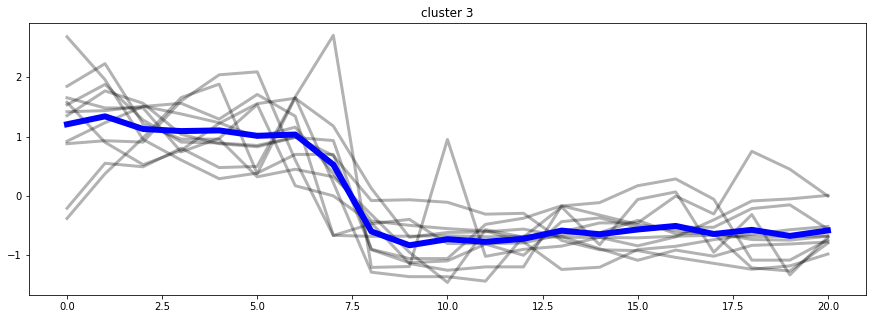

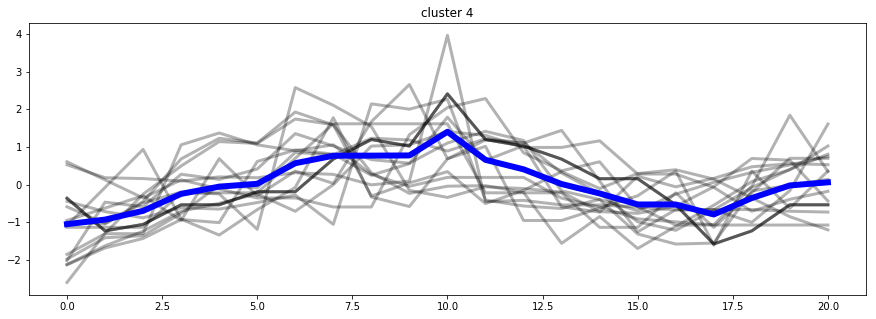

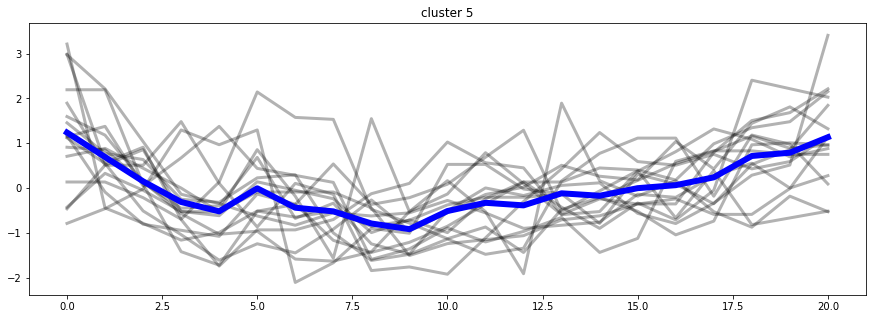

In [55]:
for i in range(nc):
    fig = plt.figure(figsize = (15,5))
    for j in range(len(vals[vals['6kmeans'] == i])):
        ax = fig.add_subplot(111)
        ax.plot(range(21), vals[vals['6kmeans'] == i].iloc[j,0:21], c='k', linewidth = 3, alpha = .3)
    ax.plot(range(21), vals[vals['6kmeans'] == i].iloc[:,:21].mean(), c = 'b', linewidth = 6)
    ax.set_title('cluster {}'.format(i))

### Figure 3: 
KMeans Clustering with n = 6 applied on time series data. We can see that the cluster 0 and 2 have the most data and thus their trends is much clearer than others.

In [119]:
vals_merge = vals.reset_index()
vals_merge = vals_merge[['zip', '6kmeans']]
nyczipsshp = nyczipsshp.merge(vals_merge, left_on = 'ZIPCODE', right_on = 'zip')
nyczipsshp.drop(['zip'], axis = 1, inplace = True)
nyczipsshp.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0    11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1    11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2    11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3    11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4    11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  5kmeans  6kmeans  
0  POLYGON ((1038098.251871482 188138.3800067157,...        3        0  
1  POLYGON ((1001613.712964058 186926.4395172149,...        3        0  
2  POLYGON ((1011174.275535807 183696.33770971, 1...        3        0  
3  POLYGON ((995908.3654508889 183617.6128015518,...        3        0  
4  POLYGON ((991997.1134308875 176307.4958601296,...        3        0

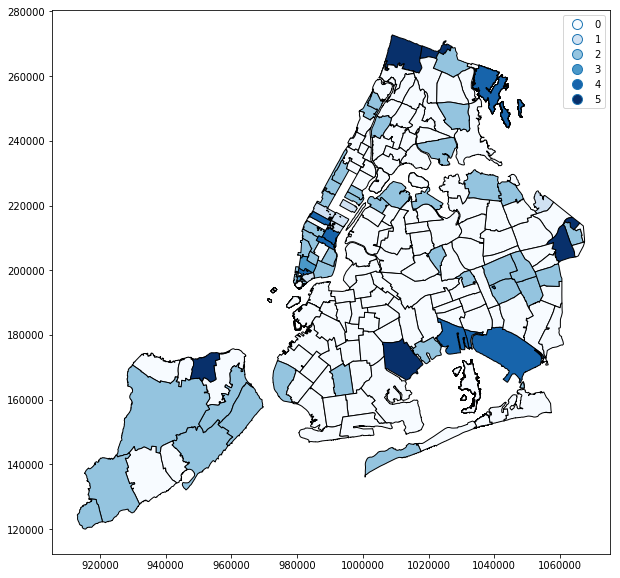

In [57]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
nyczipsshp.plot(column = '6kmeans', cmap = 'Blues', edgecolor = 'k', legend=True, categorical=True, ax = ax)

### Figure 4: 
cloropleth of  cluster centers for 6 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

## KMeans Clustering with n = 7

In [120]:
nc = 7
km = KMeans(n_clusters=nc, random_state=444).fit(vals)
vals['7kmeans'] = km.labels_
km.labels_

array([0, 0, 1, 1, 1, 1, 1, 0, 4, 5, 0, 2, 0, 0, 4, 0, 5, 6, 1, 6, 5, 6, 6,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 5, 1, 6, 1, 0, 0, 5, 1, 0,
       6, 5, 6, 3, 3, 4, 2, 6, 6, 0, 1, 6, 0, 3, 6, 4, 6, 0, 4, 6, 3, 3, 3,
       3, 5, 6, 6, 1, 3, 6, 2, 1, 4, 4, 1, 6, 4, 3, 4, 6, 2, 0, 2, 0, 4, 0,
       4, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 3, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 5, 5, 5, 1, 0, 1, 1, 1, 3, 3, 1, 0, 1, 1, 1, 0, 3, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 5, 0, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 0, 5, 0,
       0, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


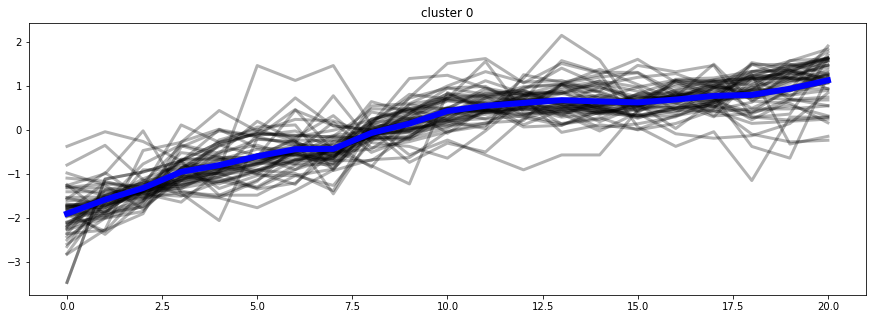

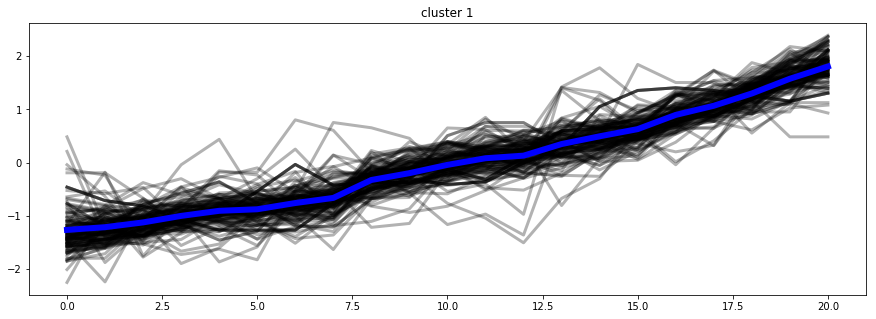

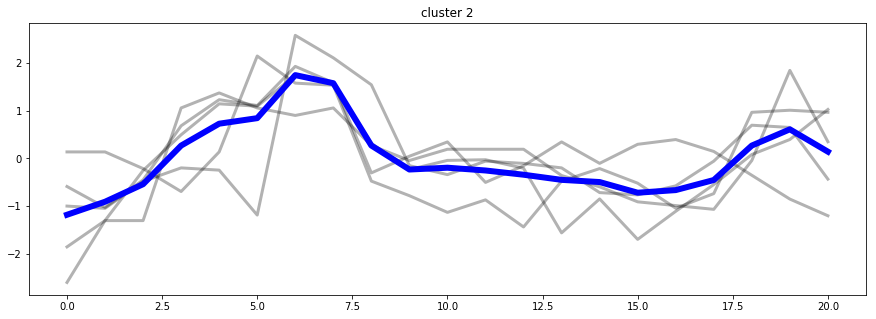

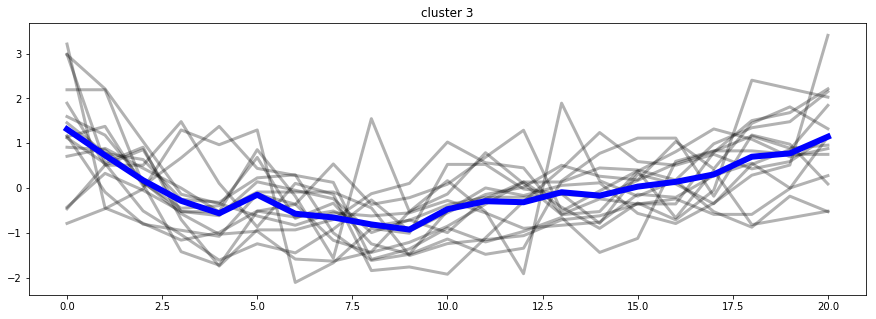

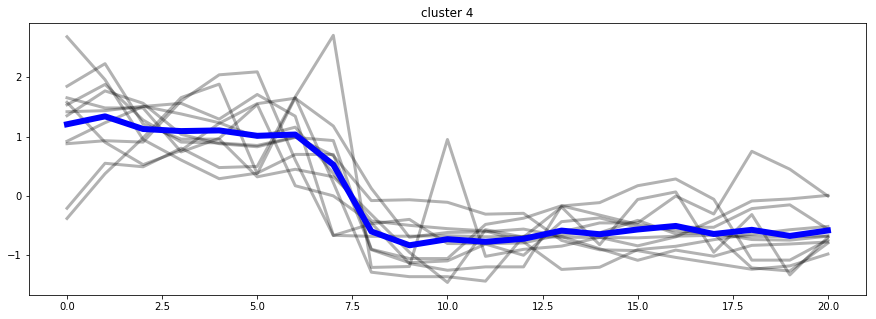

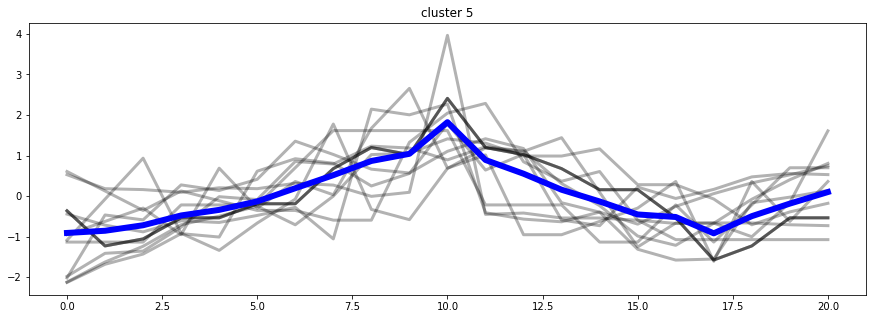

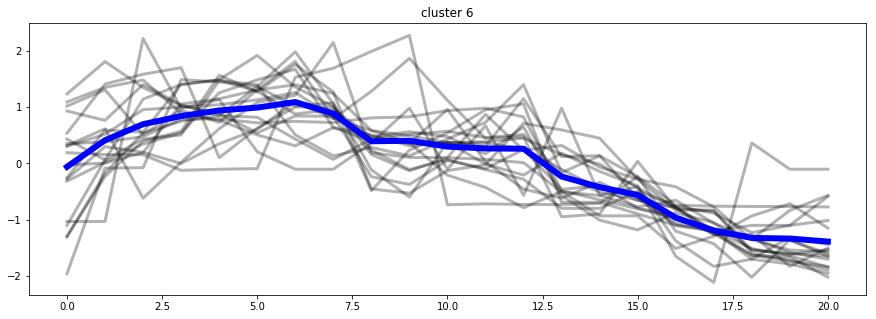

In [59]:
for i in range(nc):
    fig = plt.figure(figsize = (15,5))
    for j in range(len(vals[vals['7kmeans'] == i])):
        ax = fig.add_subplot(111)
        ax.plot(range(21), vals[vals['7kmeans'] == i].iloc[j,0:21], c='k', linewidth = 3, alpha = .3)
    ax.plot(range(21), vals[vals['7kmeans'] == i].iloc[:,:21].mean(), c = 'b', linewidth = 6)
    ax.set_title('cluster {}'.format(i))

### Figure 4: 
KMeans Clustering with n = 6 applied on time series data. We can see that the cluster 0 and 1 have the most data and thus their trends is much clearer than others.

In [121]:
vals_merge = vals.reset_index()
vals_merge = vals_merge[['zip', '7kmeans']]
nyczipsshp = nyczipsshp.merge(vals_merge, left_on = 'ZIPCODE', right_on = 'zip')
nyczipsshp.drop(['zip'], axis = 1, inplace = True)
nyczipsshp.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0    11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1    11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2    11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3    11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4    11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  5kmeans  6kmeans  \
0  POLYGON ((1038098.251871482 188138.3800067157,...        3        0   
1  POLYGON ((1001613.712964058 186926.4395172149,...        3        0   
2  POLYGON ((1011174.275535807 183696.33770971, 1...        3        0   
3  POLYGON ((995908.3654508889 183617.6128015518,...        3        0   
4  POLYGON ((991997.1134308875 176307.4958601296,...        3        0   

   7kmeans  
0        1  
1        1  
2        1  
3        1  
4        1

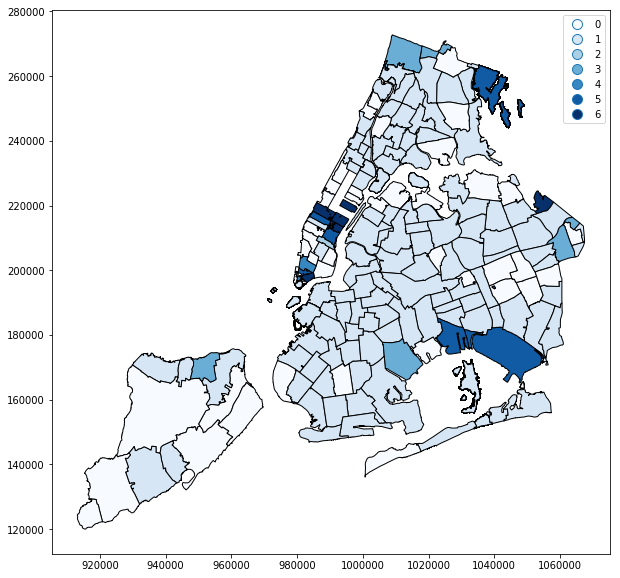

In [61]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
nyczipsshp.plot(column = '7kmeans', cmap = 'Blues', edgecolor = 'k', legend=True, categorical=True, ax = ax)

### Figure 6: 
cloropleth of  cluster centers for 7 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

## Agglomerative Clustering with n = 7

In [122]:
nc = 7
agc = AgglomerativeClustering(n_clusters=nc, linkage='average').fit(vals)
vals['7agglo'] = agc.labels_
agc.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 2, 3, 2, 2, 1, 2, 4, 1, 2, 1, 4, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 2, 2, 2, 4, 2, 6,
       1, 4, 1, 0, 0, 1, 3, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0,
       0, 4, 1, 1, 2, 0, 1, 3, 2, 1, 1, 2, 1, 1, 0, 1, 1, 3, 2, 3, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 5, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


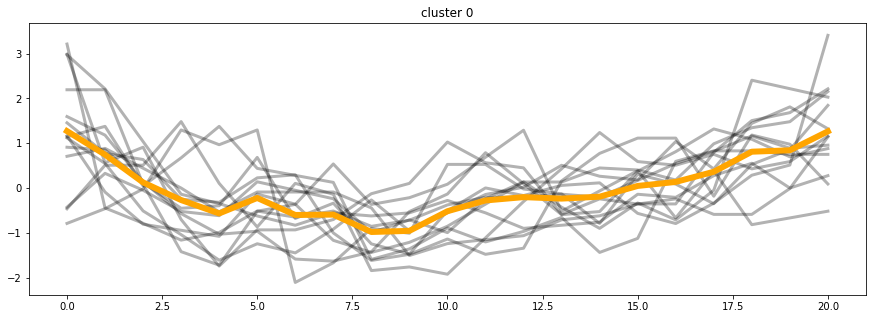

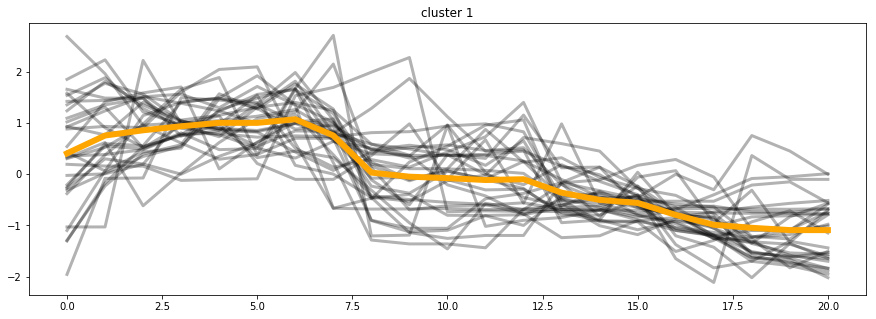

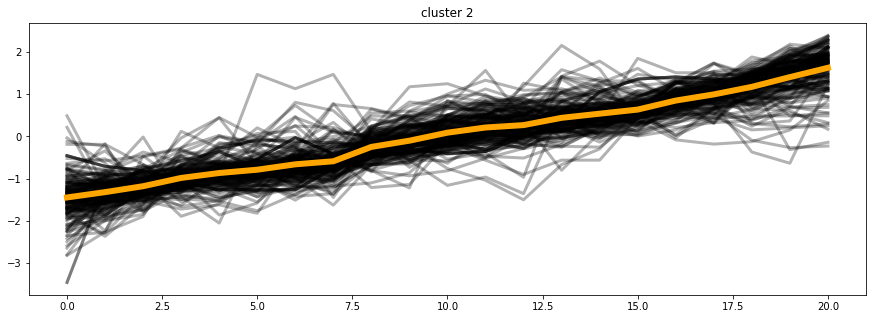

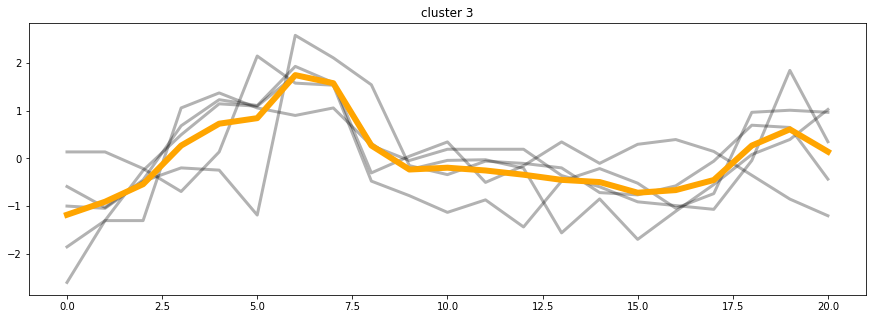

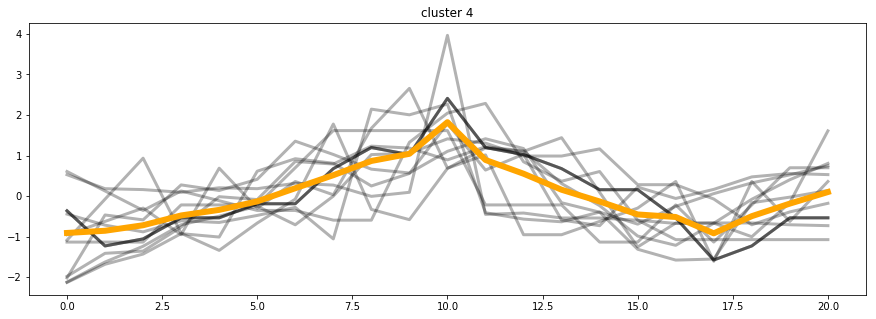

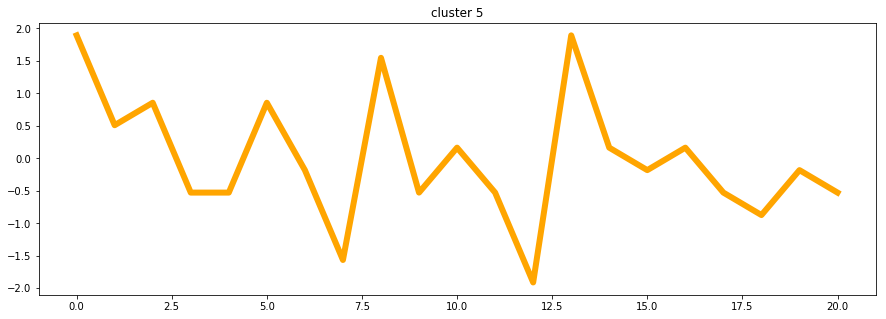

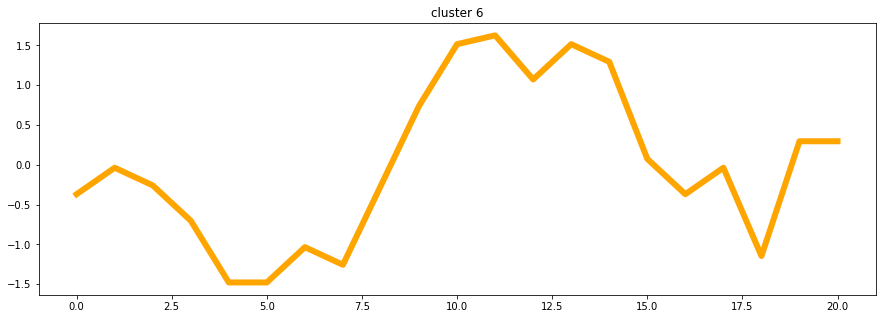

In [67]:
for i in range(nc):
    fig = plt.figure(figsize = (15,5))
    for j in range(len(vals[vals['7agglo'] == i])):
        ax = fig.add_subplot(111)
        ax.plot(range(21), vals[vals['7agglo'] == i].iloc[j,0:21], c='k', linewidth = 3, alpha = .3)
    ax.plot(range(21), vals[vals['7agglo'] == i].iloc[:,:21].mean(), c = 'orange', linewidth = 6)
    ax.set_title('cluster {}'.format(i))

### Figure 7: 
Agglomerative Clustering with n = 7 applied on time series data. We can see that the cluster 2 has the most data and thus its trends is much clearer than others.

In [123]:
vals_merge = vals.reset_index()
vals_merge = vals_merge[['zip', '7agglo']]
nyczipsshp = nyczipsshp.merge(vals_merge, left_on = 'ZIPCODE', right_on = 'zip')
nyczipsshp.drop(['zip'], axis = 1, inplace = True)
nyczipsshp.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0    11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1    11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2    11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3    11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4    11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  5kmeans  6kmeans  \
0  POLYGON ((1038098.251871482 188138.3800067157,...        3        0   
1  POLYGON ((1001613.712964058 186926.4395172149,...        3        0   
2  POLYGON ((1011174.275535807 183696.33770971, 1...        3        0   
3  POLYGON ((995908.3654508889 183617.6128015518,...        3        0   
4  POLYGON ((991997.1134308875 176307.4958601296,...        3        0   

   7kmeans  7agglo  
0        1       2  
1        1       2  
2        1       2  
3        1       2  
4        1       2

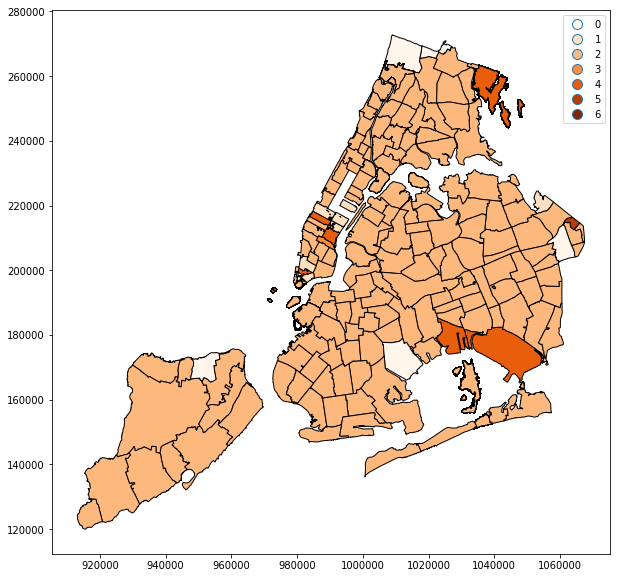

In [70]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
nyczipsshp.plot(column = '7agglo', cmap = 'Oranges', edgecolor = 'k', legend=True, categorical=True, ax = ax)

### Figure 8: 
cloropleth of cluster centers for 7 agglomerative clustering of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

(array([   5,   15,   25,   35,   45,   55,   65,   75,   85,   95,  105,
         115,  125,  135,  145,  155,  165,  175,  185,  195,  205,  215,
         225,  235,  245,  255,  265,  275,  285,  295,  305,  315,  325,
         335,  345,  355,  365,  375,  385,  395,  405,  415,  425,  435,
         445,  455,  465,  475,  485,  495,  505,  515,  525,  535,  545,
         555,  565,  575,  585,  595,  605,  615,  625,  635,  645,  655,
         665,  675,  685,  695,  705,  715,  725,  735,  745,  755,  765,
         775,  785,  795,  805,  815,  825,  835,  845,  855,  865,  875,
         885,  895,  905,  915,  925,  935,  945,  955,  965,  975,  985,
         995, 1005, 1015, 1025, 1035, 1045, 1055, 1065, 1075, 1085, 1095,
        1105, 1115, 1125, 1135, 1145, 1155, 1165, 1175, 1185, 1195, 1205,
        1215, 1225, 1235, 1245, 1255, 1265, 1275, 1285, 1295, 1305, 1315,
        1325, 1335, 1345, 1355, 1365, 1375, 1385, 1395, 1405, 1415, 1425,
        1435, 1445, 1455, 1465, 1475, 

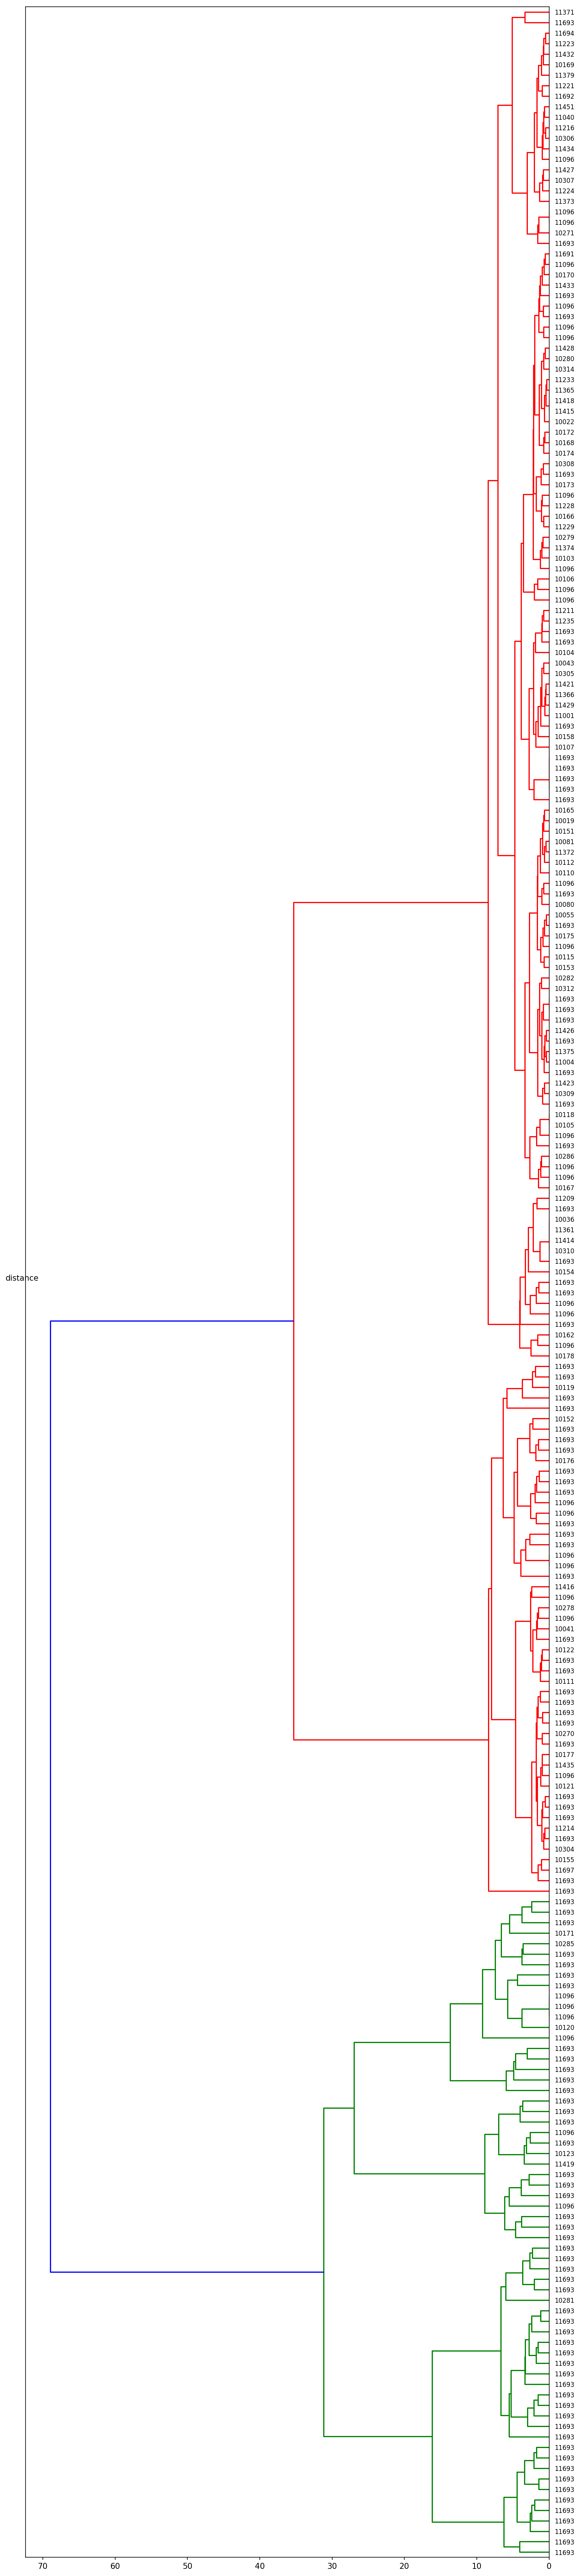

In [124]:
import scipy.cluster as scp
fig = plt.figure(figsize=(12,60), dpi=150)
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = list(nyczipsshp['ZIPCODE']),
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8., orientation = 'left')  # font size for the x axis labels)
plt.ylabel("distance").set_rotation(0)
plt.yticks(rotation = 0)

### Figure 9: 
dandrogram plot for hierarchical clustering

## Clustering Results Comparing

Text(0.5,1,'Agglomerative with n = 7')

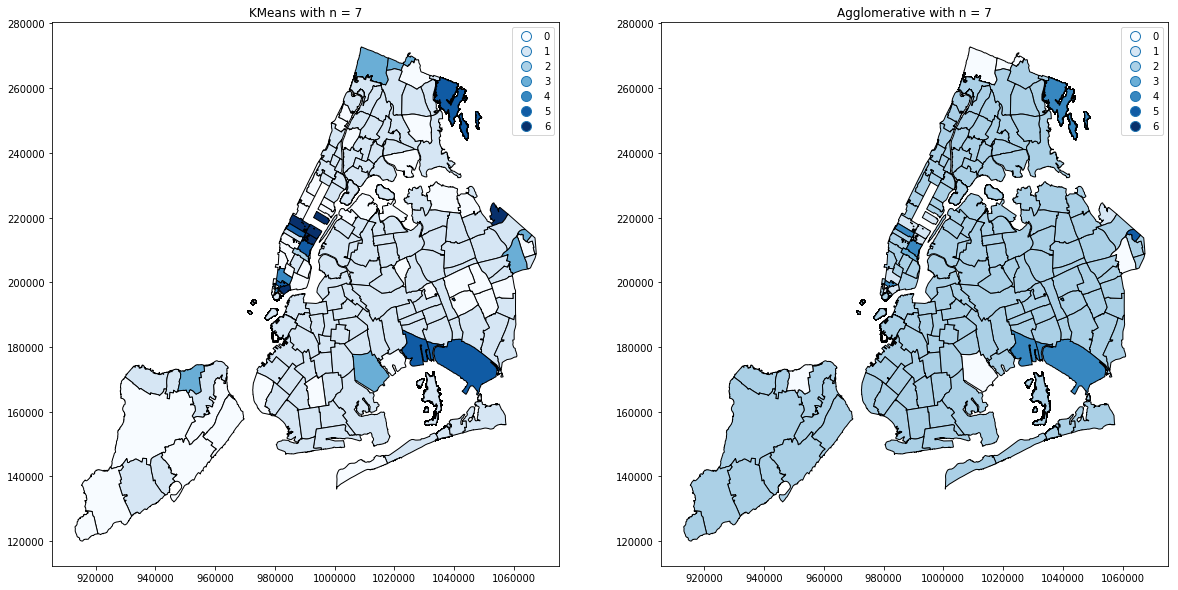

In [126]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)
nyczipsshp.plot(column = '7kmeans', cmap = 'Blues', edgecolor = 'k', legend=True, categorical=True, ax = ax)
ax.set_title('KMeans with n = 7')

ax = fig.add_subplot(122)
nyczipsshp.plot(column = '7agglo', cmap = 'Blues', edgecolor = 'k', legend=True, categorical=True, ax = ax)
ax.set_title('Agglomerative with n = 7')

### Figure 10: 
cloropleth of  cluster centers for 7 k-means clusters and 7 agglomerative clustering of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

We can see the two results are very similar in patterns with most of the data points in KMeans are labeled 0 and most of the data points in Agglomerative are labeled 2, and the boroughs in bottom right and top right part are all plotted in a darker color.